In [4]:
#Make imports
import requests
import sqlite3 as lite
import datetime
import pandas as pd

#url copied from https://darksky.net/dev/account
url = "https://api.darksky.net/forecast/e1bc86e2f1bce28a3a0b995938c07bf8/"

#Make a list of cities with latituge and longitude as values of dictionary
cities ={"Kathmandu": '27.7172, 85.3240',
"Pokhara": '28.2380, 83.9956',
"Chitwan": '27.5291, 84.3542',
"Bardiya": '28.3102, 81.4279',
"Langtang_NP": '28.2063, 85.6229'
    }

In [7]:
#Find the order of cities
cities.keys()

dict_keys(['Kathmandu', 'Chitwan', 'Langtang_NP', 'Pokhara', 'Bardiya'])

In [13]:
#cur time
datetime.datetime.now()

datetime.datetime(2017, 1, 2, 19, 24, 46, 192911)

In [6]:
#Making connection and using a final point of time rather than cur time
con = lite.connect('c:\\sqlite3\\weather.db')
cur = con.cursor()

fin_date=datetime.datetime(2017, 1, 2, 19, 24, 46, 192911)

In [28]:
 #not to run this code twice

#with con:
    #cur.execute('CREATE TABLE nepcity_high (day_of_reading INT, Kathmandu REAL, Chitwan REAL, Langtang_NP REAL, Pokhara REAL, Bardiya REAL);')

In [15]:
query_date = fin_date - datetime.timedelta(days=30) #the current value being processed
#con.close()  #not to run this code twice
with con:
    while query_date < fin_date:
        cur.execute("INSERT INTO nepcity_high(day_of_reading) VALUES (?)", (int(query_date.timestamp()),))
        query_date += datetime.timedelta(days=1)

In [17]:
#con.close()  #not to run this code twice
for k,v in cities.items():
    query_date = fin_date - datetime.timedelta(days=30) #set value each time through the loop of cities
    while query_date < fin_date:
        #query for the value
        r = requests.get(url + v + ',' +  query_date.strftime('%Y-%m-%dT12:00:00'))

        with con:
            #insert the temperature max to the database
            cur.execute('UPDATE nepcity_high SET ' + k + ' = ' + str(r.json()['daily']['data'][0]['temperatureMax']) + ' WHERE day_of_reading = ' + str(int(query_date.timestamp())))

        #increment query_date to the next day for next operation of loop
        query_date += datetime.timedelta(days=1) #increment query_date to the next day


#con.close() # a good practice to close connection to database

In [7]:
#GET DATA SAVED INTO FRAMEWORK
#import pandas as pd
weatherData=pd.read_sql_query("SELECT * FROM nepcity_high ORDER BY day_of_reading", con, index_col='day_of_reading')


In [33]:
weatherData.head()


,Kathmandu,Chitwan,Langtang_NP,Pokhara,Bardiya,dates,dates_new,dt
day_of_reading,,,,,,,,
1480772386,70.65,74.51,70.0,73.15,77.17,1480772386,2016-12-03,2016-12-03
1480858786,69.91,68.34,64.0,70.71,66.95,1480858786,2016-12-04,2016-12-04
1480945186,72.00,72.00,72.0,74.64,69.87,1480945186,2016-12-05,2016-12-05
1481031586,72.00,74.20,72.0,74.01,74.01,1481031586,2016-12-06,2016-12-06
1481117986,73.00,73.00,73.0,74.72,72.65,1481117986,2016-12-07,2016-12-07


In [37]:
#newdf = df[df.columns[2:4]]  displaying single or multiple columns
x=weatherData[weatherData.columns[0:1]]
#x.head()

In [35]:
#indexing
weatherData['dates'] = weatherData.index.values

In [12]:
import datetime

#weatherData['dates'][:3].datetime.fromtimestamp('%Y-%m-%d')
#df['timestamp'] = pd.to_datetime(df['timestamp'])
#weatherData['days']=pd.to_datetime(weatherData['dates']).dt.date  #pd.to_datetime converts time stamp df['timestamp'] and .dt.date give dateonly
#weatherData['days']= weatherData['dates'].map(lambda x: pd.to_datetime(x))#.dt.date)  
x=weatherData['dates'][0:3]
pd.to_datetime(x)
#days
#weatherData

day_of_reading
1480772386   1970-01-01 00:00:01.480772386
1480858786   1970-01-01 00:00:01.480858786
1480945186   1970-01-01 00:00:01.480945186
Name: dates, dtype: datetime64[ns]

In [13]:
#getting dates from timestamp
import datetime
y=[]
x=weatherData['dates'].tolist() #had to work with list as mapping was not working well
for i in range (len(x)):
    w=datetime.datetime.fromtimestamp(float(x[i]))
    w.date()
    y.append(w)
    #print (datetime.datetime.fromtimestamp(float(x[i])))
y
#milestone["only_date"] = [d.date() for d in milestone["datetime"]]
z=[]
z=[d.date() for d in y]   #this splits the date from date-time object
z
weatherData['dates_new']=z  #inserts into dataframe
weatherData.head()

,Kathmandu,Chitwan,Langtang_NP,Pokhara,Bardiya,dates,dates_new
day_of_reading,,,,,,,
1480772386,70.65,74.51,70.0,73.15,77.17,1480772386,2016-12-03
1480858786,69.91,68.34,64.0,70.71,66.95,1480858786,2016-12-04
1480945186,72.00,72.00,72.0,74.64,69.87,1480945186,2016-12-05
1481031586,72.00,74.20,72.0,74.01,74.01,1481031586,2016-12-06
1481117986,73.00,73.00,73.0,74.72,72.65,1481117986,2016-12-07


In [14]:
#Again getting dates from timestamp

weatherData['dt']=weatherData['dates'].map(lambda x:datetime.datetime.fromtimestamp(float(x)) )
#weatherData.dt.head()
weatherData['dt']=weatherData['dt'].dt.date #best way to do it
#weatherData['dt']=[d.date() for d in weatherData['dt']]  #this works fine

weatherData.head()

,Kathmandu,Chitwan,Langtang_NP,Pokhara,Bardiya,dates,dates_new,dt
day_of_reading,,,,,,,,
1480772386,70.65,74.51,70.0,73.15,77.17,1480772386,2016-12-03,2016-12-03
1480858786,69.91,68.34,64.0,70.71,66.95,1480858786,2016-12-04,2016-12-04
1480945186,72.00,72.00,72.0,74.64,69.87,1480945186,2016-12-05,2016-12-05
1481031586,72.00,74.20,72.0,74.01,74.01,1481031586,2016-12-06,2016-12-06
1481117986,73.00,73.00,73.0,74.72,72.65,1481117986,2016-12-07,2016-12-07


In [15]:
#Getting summary of stats from the table
weatherData.describe()

,Kathmandu,Chitwan,Langtang_NP,Pokhara,Bardiya,dates
count,30.000000,30.000000,30.000000,30.000000,30.000000,3.000000e+01
mean,65.924333,72.064333,59.643000,70.501667,71.684000,1.482025e+09
std,5.073907,2.528158,12.332555,4.388164,2.731488,7.606145e+05
min,54.970000,65.090000,28.550000,51.010000,66.950000,1.480772e+09
25%,61.492500,71.305000,47.572500,69.322500,69.407500,1.481399e+09
50%,66.200000,72.245000,65.000000,71.505000,71.380000,1.482025e+09
75%,70.487500,74.167500,70.000000,73.067500,73.382500,1.482652e+09
max,73.000000,75.380000,73.000000,74.720000,77.170000,1.483278e+09


<function matplotlib.pyplot.show>

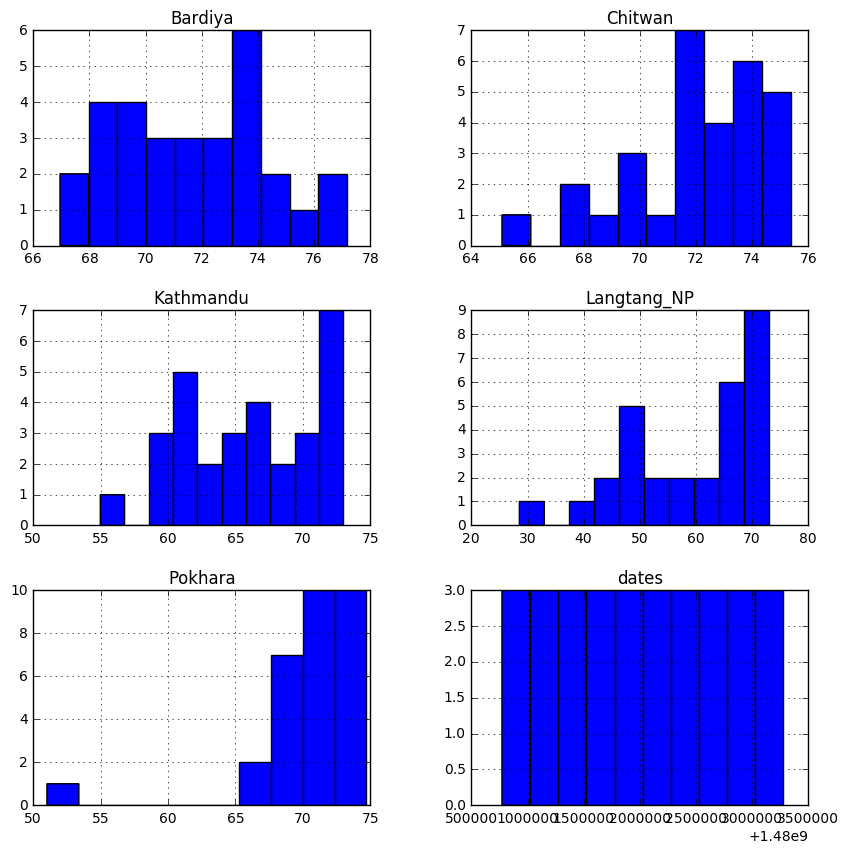

In [38]:
#plotting the temperature as it is
import matplotlib.pyplot as plt
%matplotlib inline

weatherData.hist(figsize=(10, 10))
#weatherData['Kathmandu'].hist()
plt.show

In [26]:
#Getting the daily difference
#data.set_index('Date').diff()
daily_diff = weatherData.diff()
daily_diff.head()

,Kathmandu,Chitwan,Langtang_NP,Pokhara,Bardiya,dates,dates_new,dt
day_of_reading,,,,,,,,
1480772386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480858786,-0.74,-6.17,-6.0,-2.44,-10.22,86400.0,"1 day, 0:00:00","1 day, 0:00:00"
1480945186,2.09,3.66,8.0,3.93,2.92,86400.0,"1 day, 0:00:00","1 day, 0:00:00"
1481031586,0.00,2.20,0.0,-0.63,4.14,86400.0,"1 day, 0:00:00","1 day, 0:00:00"
1481117986,1.00,-1.20,1.0,0.71,-1.36,86400.0,"1 day, 0:00:00","1 day, 0:00:00"


<function matplotlib.pyplot.show>

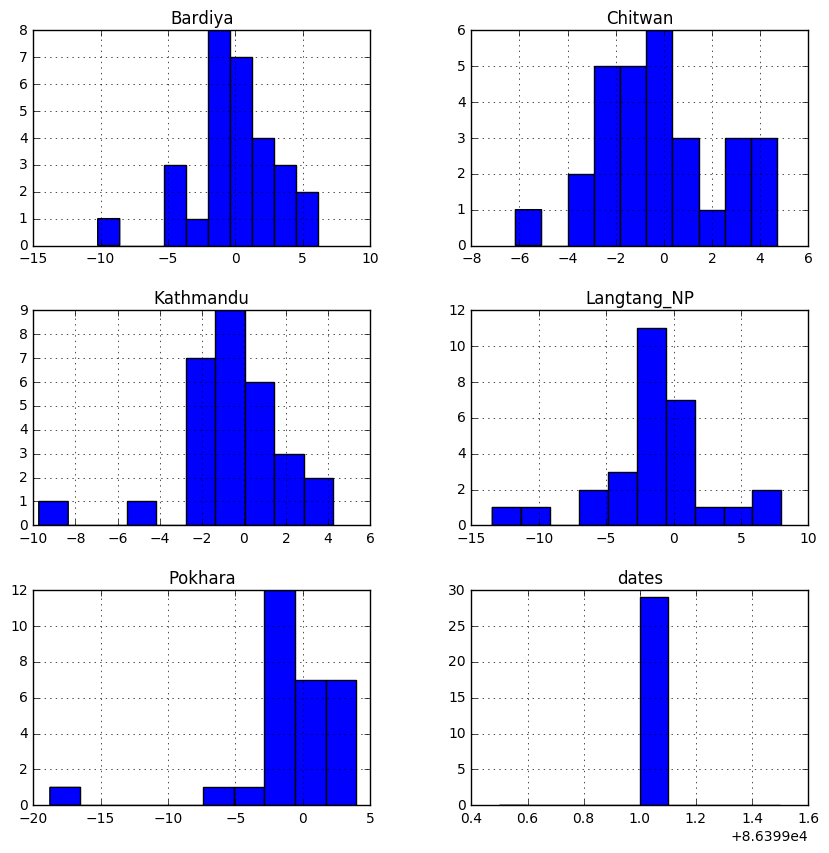

In [25]:
daily_diff.hist(figsize=(10, 10))
plt.show

In [31]:
#Getting summary  of stats
daily_diff.dropna(inplace=True)
daily_diff.describe()

,Kathmandu,Chitwan,Langtang_NP,Pokhara,Bardiya,dates
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,-0.540690,-0.031724,-1.429310,-0.763448,-0.132414,86400.0
std,2.665792,2.498643,4.295788,4.200803,3.311564,0.0
min,-9.740000,-6.170000,-13.450000,-18.770000,-10.220000,86400.0
25%,-1.600000,-1.860000,-2.010000,-1.300000,-1.360000,86400.0
50%,-0.700000,-0.490000,-1.040000,-0.630000,0.050000,86400.0
75%,1.000000,1.000000,0.000000,0.710000,2.050000,86400.0
max,4.230000,4.700000,8.000000,3.960000,6.110000,86400.0


Summary:
The values are availabe for 29 readings (last one can't have difference)
As per standard deviation Langtang  region and Pokhara city has the maximum variation in temperature
Expectedly Langtang and Pokhara has max single day difference in reading
Temperature difference duting the month is skewed - Almost all are skewed towards cold weather except Bardiya which lies in low elevation/hot belt of Nepal. The differnce is consistent with the month December where temperature keeps dropping


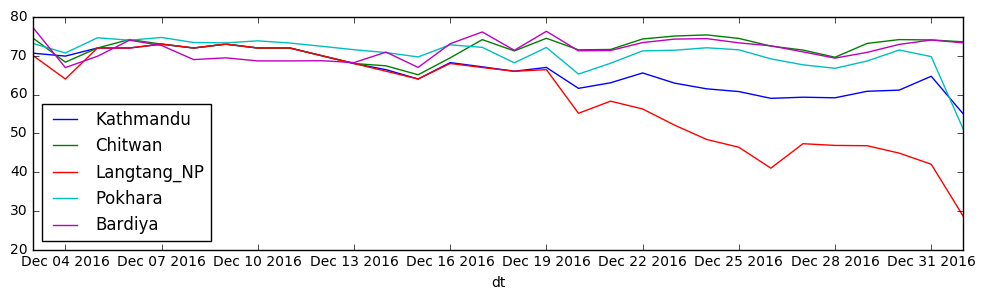

In [40]:
#data2 = data.set_index('a')
weatherData_dt=weatherData.set_index('dt')
weatherData_dt[['Kathmandu', 'Chitwan', 'Langtang_NP', 'Pokhara', 'Bardiya']].plot(figsize= (12, 3))